In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta

In [3]:
#define the time period for the data
end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days=365)).strftime('%Y-%m-%d')

In [12]:
#list of stock tickters to download
tickers = ['RELIANCE.NS ', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
data = yf .download(tickers, start=start_date, end=end_date, progress=False)

## reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RELIANCE.NS ']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-07-07  HDFCBANK.NS  1638.031982  1660.400024  1675.000000   
1         2023-07-07      INFY.NS  1305.842773  1330.199951  1345.800049   
2         2023-07-07       TCS.NS  3272.980713  3329.250000  3356.899902   
3         2023-07-10  HDFCBANK.NS  1634.135132  1656.449951  1676.750000   
4         2023-07-10      INFY.NS  1304.812012  1329.150024  1341.900024   

Attribute          Low         Open      Volume  
0          1656.300049  1665.000000   9963168.0  
1          1325.349976  1334.000000   6295647.0  
2          3302.000000  3302.000000   1789326.0  
3          1649.699951  1661.000000  19199221.0  
4          1319.300049  1336.550049   3940315.0  


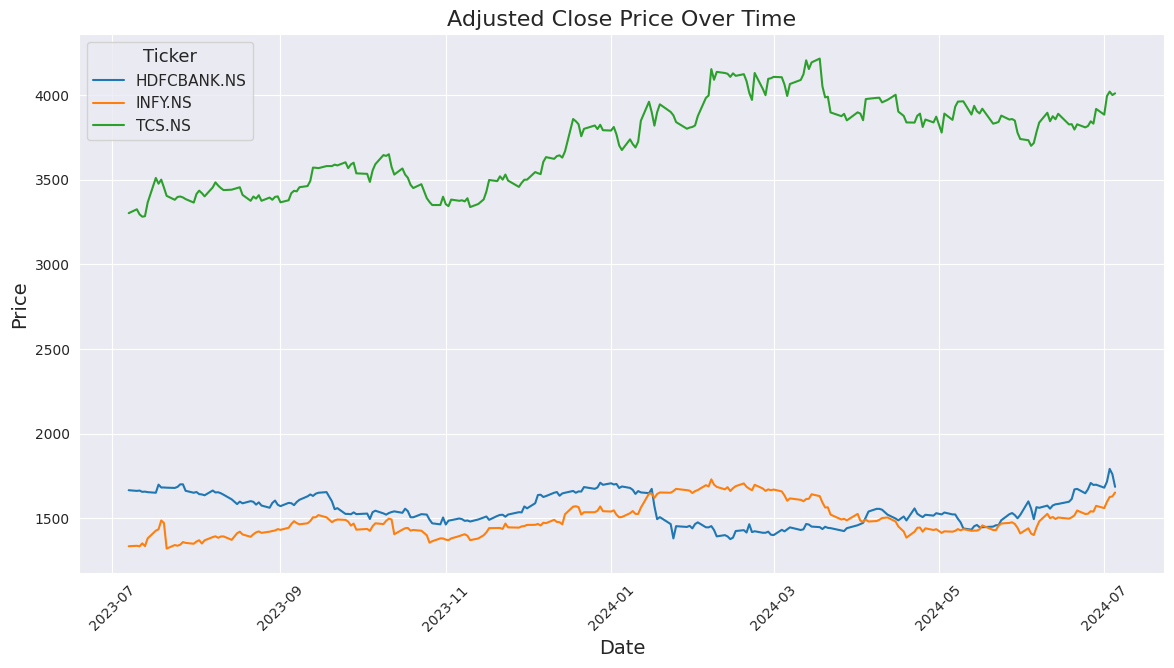

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Data'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Data', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14 ,7))
sns.set_style('darkgrid')
sns.lineplot(data=stock_data, x='Date', y='Open', hue='Ticker')
plt.title('Adjusted Close Price Over Time', fontsize='16')
plt.xlabel('Date', fontsize= 14)
plt.ylabel('Price', fontsize= 14 )
plt.legend(title='Ticker',title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()